In [2]:
import numpy as np
import matplotlib.pyplot as plt

# from decimal import Decimal
from typing import Dict, List

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Olek Zima\workspace\code\MIW\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
  File "C:\Users\Olek Zima\AppData\Local\Temp\ipykernel_10672\4054265850.py", line 1, in <module>
    import numpy as np
ModuleNotFoundError: No module named 'numpy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Olek Zima\workspace\code\MIW\.venv\Lib\site-packages\pygments\styles\__init__.py", line 45, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Olek Zima\workspace\code\MIW\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
  File "c:\Users\Olek Zima\workspace\code\MIW\.venv\Lib\site-packages\IPython\core\ultratb.py", line 1454, in structured_traceback
  Fi

In [61]:
game_states: List[str] = ["Rock", "Paper", "Scissors"]

In [62]:
def matrix_to_ndarray(transition_matrix) -> np.ndarray:
    transition_matrix_ndarray: np.ndarray = np.array(
        [
            [transition_matrix[game_states[i]][game_states[j]] for j in range(3)]
            for i in range(3)
        ],
        dtype=np.double,
    )
    return transition_matrix_ndarray

In [63]:
def create_state_vector(
    transition_matrix: Dict[str, Dict[str, float]],
    state_vector_init: List[float] = [1 / 3, 1 / 3, 1 / 3],
) -> np.array:
    # Przejście na NDArray
    transition_matrix = matrix_to_ndarray(transition_matrix)

    # Przejście na wektor stacjonarny
    for _ in range(5):
        state_vector_init = (
            state_vector_init @ transition_matrix
        )  # np.dot(state_vector_init, transition_matrix)

    # print(f"Macierz przejść gracza:\n{transition_matrix}")
    # print(f"Wektor stacjonarny gracza:\n{state_vector_init}")

    return state_vector_init

In [64]:
##### KOMPUTER #####
# Definicja ruchów/taktyki komputera
transition_matrix_computer = {
    "Rock": {"Rock": 2 / 3, "Paper": 0 / 3, "Scissors": 1 / 3},
    "Paper": {"Rock": 1 / 3, "Paper": 2 / 3, "Scissors": 0 / 3},
    "Scissors": {"Rock": 0 / 3, "Paper": 2 / 3, "Scissors": 1 / 3},
}

vector_computer = [1 / 3, 1 / 3, 1 / 3]
vector_computer = create_state_vector(transition_matrix_computer, vector_computer)

vector_computer

array([0.40329218, 0.39780521, 0.19890261])

In [65]:
##### GRACZ #####
# Inicjalizacja stanu gotówki gracza
cash = 0
cash_history = [cash]

# WERSJA 1
vector_player = [1 / 3, 1 / 3, 1 / 3]
vector_player = create_state_vector(transition_matrix_computer, vector_player)

vector_player

array([0.40329218, 0.39780521, 0.19890261])

In [66]:
def calculate_move(previous_figure, transition_matrix):
    next_figure = np.random.choice(
        game_states,
        p=[transition_matrix[previous_figure][_] for _ in game_states],
    )
    return next_figure


def calculate_move_on_state_vector(state_vector) -> str:
    return np.random.choice(game_states, p=state_vector)

In [67]:
def game(player_figure: str, computer_figure: str) -> int:
    if player_figure == "Rock" and computer_figure == "Paper":
        return -1
    elif player_figure == "Rock" and computer_figure == "Scissors":
        return 1
    elif player_figure == "Paper" and computer_figure == "Rock":
        return 1
    elif player_figure == "Paper" and computer_figure == "Scissors":
        return -1
    elif player_figure == "Scissors" and computer_figure == "Rock":
        return -1
    elif player_figure == "Scissors" and computer_figure == "Paper":
        return 1
    elif player_figure == computer_figure:
        return 0

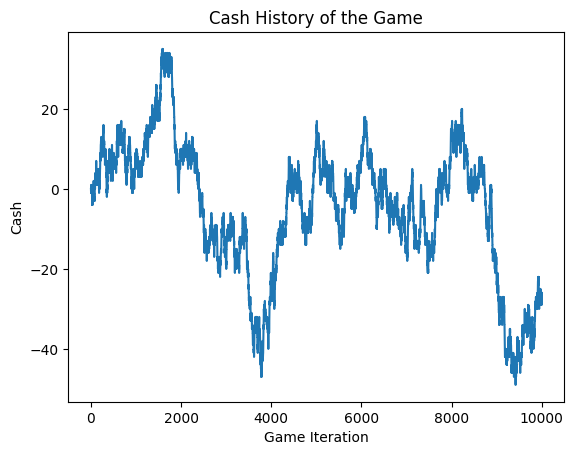

In [88]:
### GRA V.1 ###
cash = 0
cash_history = [cash]

players_move = np.random.choice(game_states)
computer_move = np.random.choice(game_states)

for _ in range(10_000):
    cash += game(players_move, computer_move)
    cash_history.append(cash)

    players_move = calculate_move_on_state_vector(vector_computer)
    computer_move = calculate_move_on_state_vector(vector_computer)

plt.plot(range(10001), cash_history)
plt.xlabel("Game Iteration")
plt.ylabel("Cash")
plt.title("Cash History of the Game")
# plt.ylim(bottom=min(cash_history) - 1)
plt.show()

Paper vs. Scissors
{'Rock': {'Rock': 0.6666666666666666, 'Paper': 0.32666666666666666, 'Scissors': 0.0}, 'Paper': {'Rock': 0.3333333333333333, 'Paper': 0.0, 'Scissors': 0.6666666666666666}, 'Scissors': {'Rock': 0.0, 'Paper': 0.6666666666666666, 'Scissors': 0.3333333333333333}}
Rock vs. Paper
{'Rock': {'Rock': 0.6577181208053692, 'Paper': 0.3288590604026846, 'Scissors': 0.0}, 'Paper': {'Rock': 0.3333333333333333, 'Paper': 0.0, 'Scissors': 0.6666666666666666}, 'Scissors': {'Rock': 0.0, 'Paper': 0.6666666666666666, 'Scissors': 0.3333333333333333}}
Rock vs. Rock
{'Rock': {'Rock': 0.6666666666666667, 'Paper': 0.33333333333333337, 'Scissors': 0.0}, 'Paper': {'Rock': 0.3333333333333333, 'Paper': 0.0, 'Scissors': 0.6666666666666666}, 'Scissors': {'Rock': 0.0, 'Paper': 0.6666666666666666, 'Scissors': 0.3333333333333333}}
Rock vs. Rock
{'Rock': {'Rock': 0.6666666666666667, 'Paper': 0.33333333333333337, 'Scissors': 0.0}, 'Paper': {'Rock': 0.3333333333333333, 'Paper': 0.0, 'Scissors': 0.6666666666

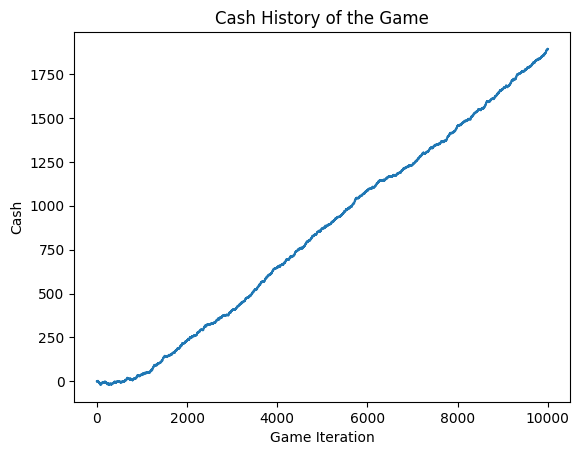

In [92]:
### GRA V.2 ###
# Definicja ruchów/taktyki gracza
transition_matrix_player: Dict[str, Dict[str, float]] = {
    "Rock": {"Rock": 2 / 3, "Paper": 1 / 3, "Scissors": 0 / 3},
    "Paper": {"Rock": 1 / 3, "Paper": 0 / 3, "Scissors": 2 / 3},
    "Scissors": {"Rock": 0 / 3, "Paper": 2 / 3, "Scissors": 1 / 3},
}
# transition_matrix_player = matrix_to_ndarray(transition_matrix_player)


def update_players_matrix(
    previous_players_move: str,
    transition_matrix_player: Dict[str, Dict[str, float]],
    computer_move: str,
):
    players_move = calculate_move(previous_players_move, transition_matrix_player)
    game_point = game(players_move, computer_move)
    transition_matrix_player[previous_players_move][players_move] += (
        game_point
        * transition_matrix_player[previous_players_move][players_move]
        * 0.02
    )

    print("=" * 80)
    print(f"{players_move} vs. {computer_move}")
    print(transition_matrix_player)

    for figure1, dic in transition_matrix_player.items():
        sum_of_values: float = sum(dic.values())
        for figure2 in dic.keys():
            transition_matrix_player[figure1][figure2] /= sum_of_values

    return (game_point, transition_matrix_player)


cash = 0
cash_history = [cash]

players_move = np.random.choice(game_states)
computer_move = np.random.choice(game_states)

for _ in range(10_000):
    computer_move = calculate_move(computer_move, transition_matrix_computer)
    game_output, transition_matrix_player = update_players_matrix(
        players_move, transition_matrix_player, computer_move
    )
    cash += game_output
    cash_history.append(cash)
    # print(transition_matrix_player)

print(create_state_vector(transition_matrix_player))

plt.plot(range(10_001), cash_history)
plt.xlabel("Game Iteration")
plt.ylabel("Cash")
plt.title("Cash History of the Game")
plt.show()